In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('flight.csv.xls')
df

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62983,18375,5/20/2011,6/5/2013,Female,4,guangzhou,guangdong,CN,25.0,3/31/2014,...,0.0,1134,6/9/2013,297,4.000000,4,1,0.000000,12318,22
62984,36041,3/8/2010,9/14/2013,Male,4,foshan,guangdong,CN,38.0,3/31/2014,...,0.0,8016,1/3/2014,89,37.000000,60,14,0.000000,106972,43
62985,45690,3/30/2006,12/2/2006,Female,4,guangzhou,guangdong,CN,43.0,3/31/2014,...,0.0,2594,3/3/2014,29,166.000000,166,0,0.000000,0,0
62986,61027,2/6/2013,2/14/2013,Female,4,guangzhou,guangdong,CN,36.0,3/31/2014,...,0.0,3934,2/26/2013,400,12.000000,12,0,0.000000,0,0


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [4]:
df.describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


In [5]:
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

EDA fokus untuk fitur yang digunakan dalam analisis RFM.

1. R (Recency): Waktu kapan terakhir customer terbang (**'LAST_TO_END'**)
2. F (Frequency): Berapa kali customer terbang (**'FLIGHT_COUNT'**)
3. M (Monetary): Berapa total jarak yang ditempuh oleh customer selama terbang (**'SEG_KM_SUM'**)

In [6]:
# drop kolom yang tidak dibutuhkan dalam pemodelan dan analisis RFM

df_rfm = df[['LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM']]
df_rfm.head()

,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM
0,1,210,580717
1,7,140,293678
2,11,135,283712
3,97,23,281336
4,5,152,309928


In [7]:
df_rfm.describe()

,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM
count,62988.000000,62988.000000,62988.000000
mean,176.120102,11.839414,17123.878691
std,183.822223,14.049471,20960.844623
min,1.000000,2.000000,368.000000
25%,29.000000,3.000000,4747.000000
50%,108.000000,7.000000,9994.000000
75%,268.000000,15.000000,21271.250000
max,731.000000,213.000000,580717.000000


In [8]:
df_rfm.isna().sum()

LAST_TO_END     0
FLIGHT_COUNT    0
SEG_KM_SUM      0
dtype: int64

Outlier Checking dengan menggunakan Boxplot

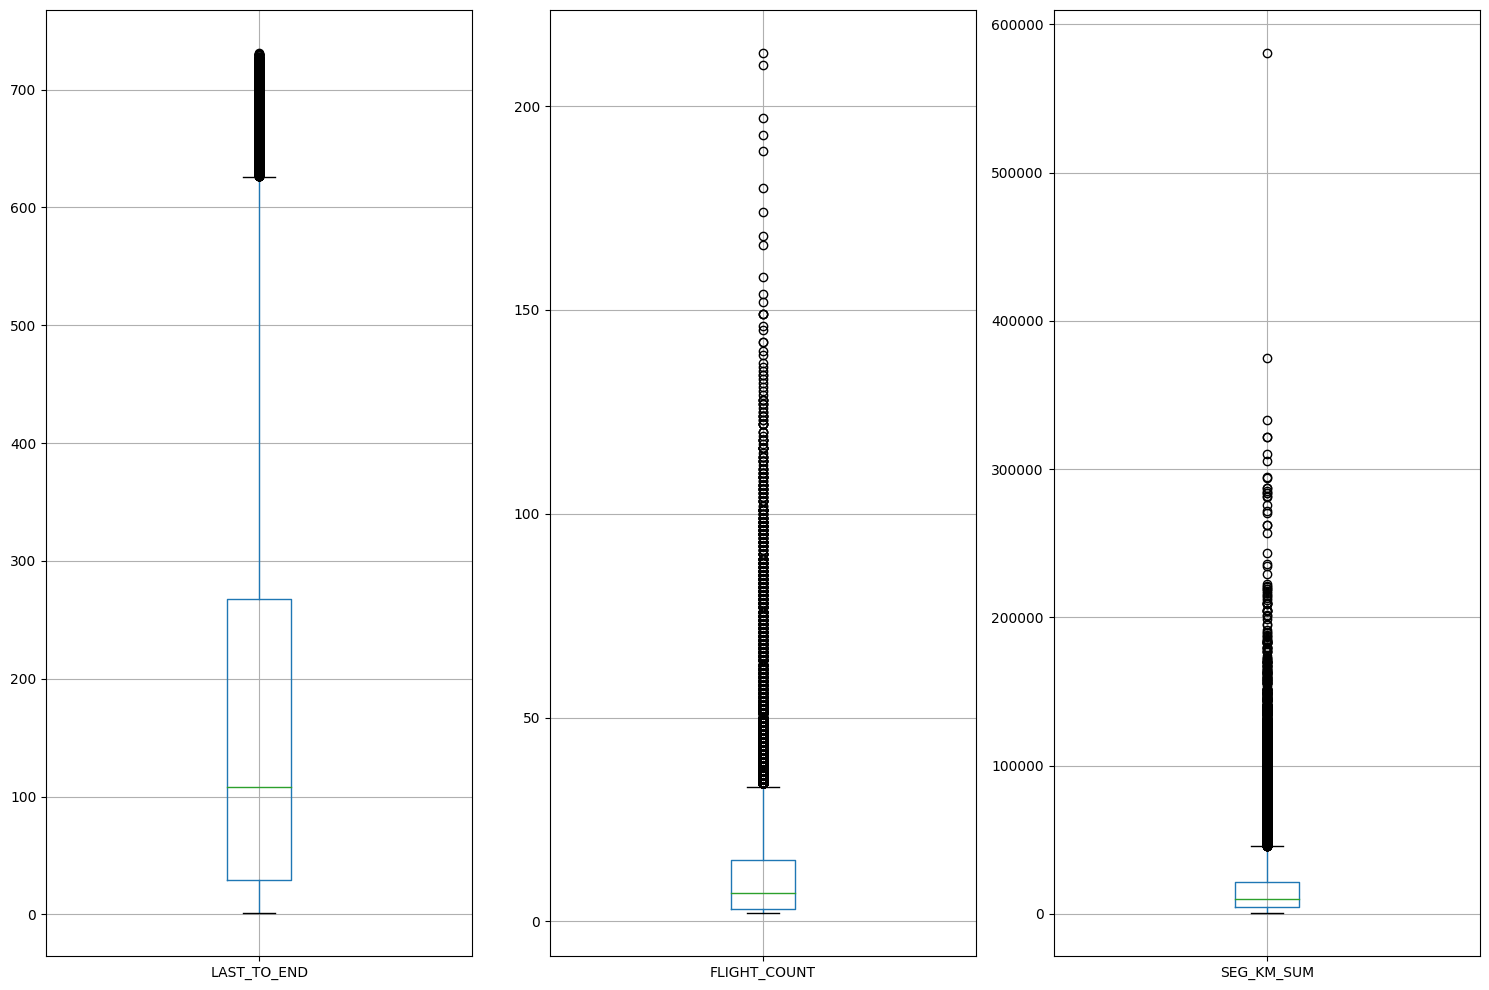

In [9]:
import matplotlib.pyplot as plt


list_columns = list(df_rfm.columns.values)

num_rows = 1
num_cols = 3

fig, ax = plt.subplots(num_rows, num_cols, figsize=(15,10))

for i, column_name in enumerate(list_columns):
    df_rfm.boxplot(column_name, ax=ax.flatten()[i])

plt.tight_layout()
plt.show()


# **Baseline**.
(tanpa handle outlier)



#### Scaling

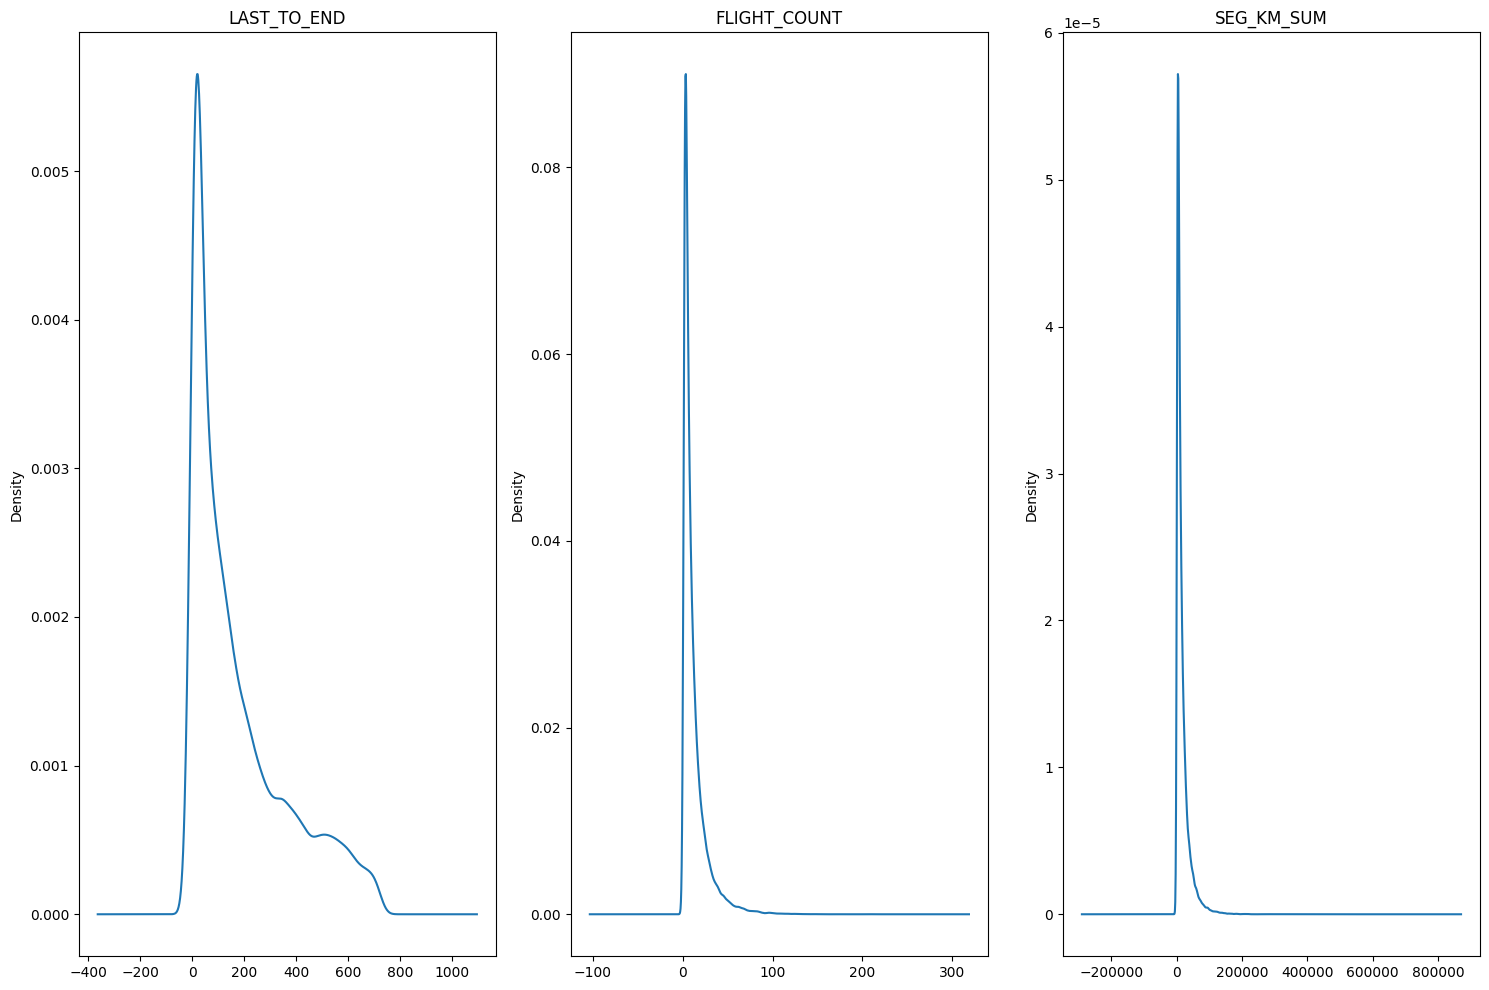

In [10]:
list_columns = list(df_rfm.columns.values)

num_rows = 1
num_cols = 3

fig, ax = plt.subplots(num_rows, num_cols, figsize=(15,10))

for i, column_name in enumerate(list_columns):
    df_rfm[column_name].plot(ax=ax.flatten()[i], kind='kde')
    ax.flatten()[i].set_title(column_name)

plt.tight_layout()
plt.show()

Kita akan melakukan standardization, dengan menggunakan **StandardScaler()** karena kita akan menggunakan K-Means Clustering untuk pemodelan. K-Means menggunakan Euclidean Distance untuk menghitung kesamaan antara titik data, dan Euclidean Distance peka terhadap perbedaan skala. Menggunakan StandardScaler menskalakan data untuk memiliki rata-rata nol dan varian unit, yang membantu mengurangi efek perbedaan skala. Ini akan membantu memastikan bahwa algoritma K-means tidak bias terhadap fitur dengan skala yg lebih besar.

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_rfm_scaled = scaler.fit_transform(df_rfm)
df_rfm_scaled = pd.DataFrame(df_rfm_scaled, columns=df_rfm.columns)

df_rfm_scaled.head()

,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM
0,-0.952668,14.104600,26.888115
1,-0.920027,9.122166,13.193949
2,-0.898267,8.766278,12.718487
3,-0.430420,0.794384,12.605132
4,-0.930907,9.976297,13.969210


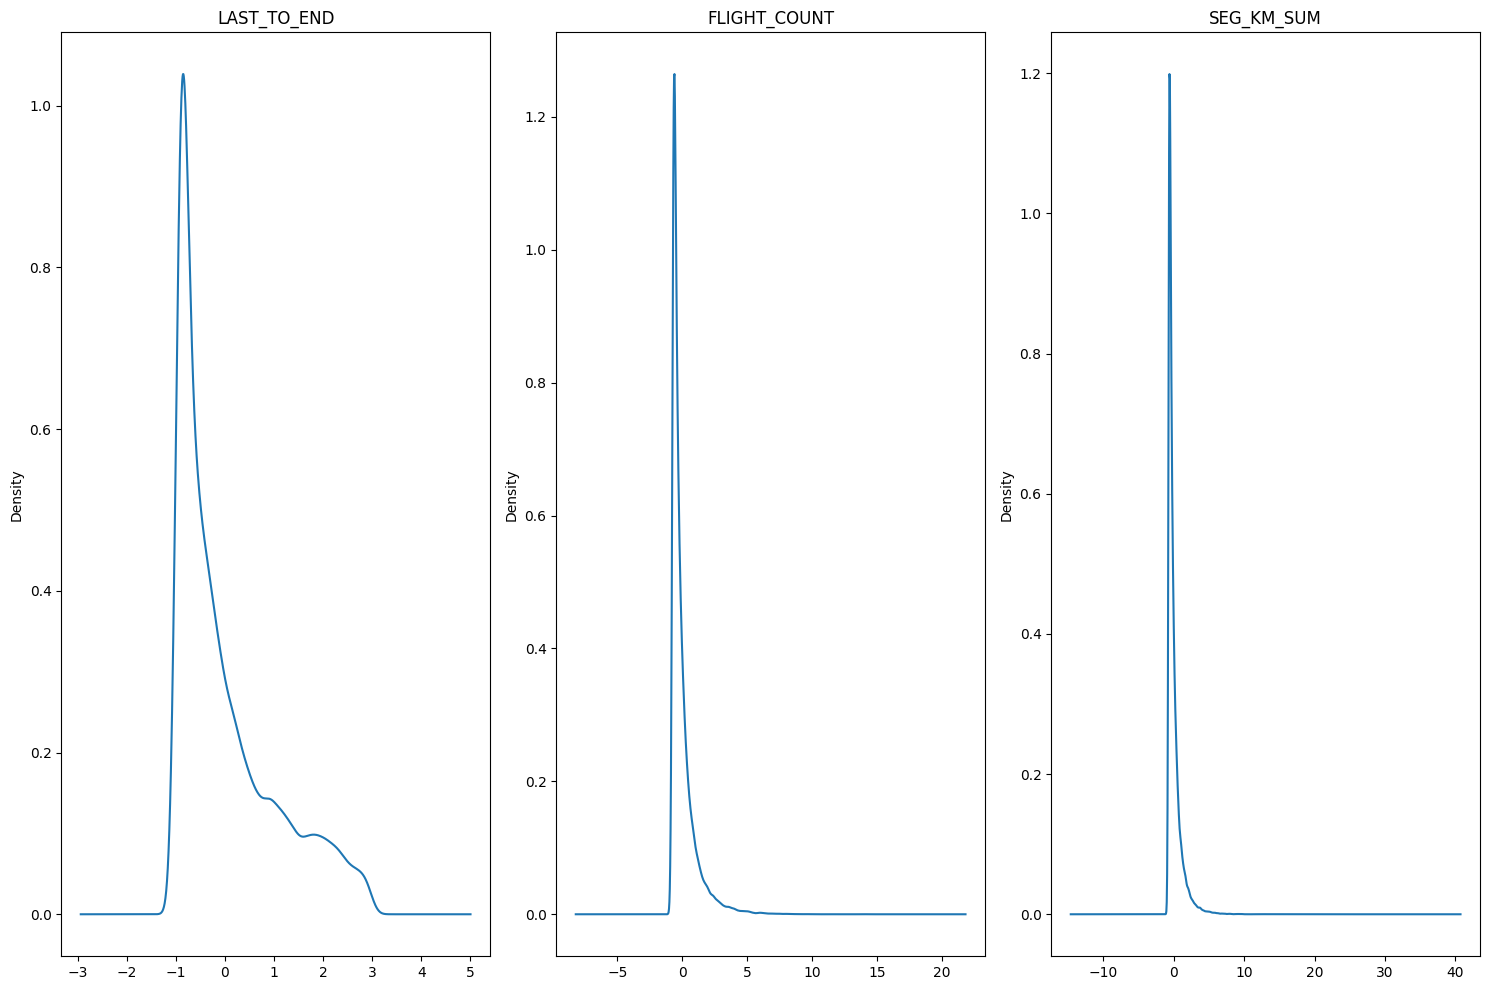

In [12]:
list_columns_scaled = list(df_rfm_scaled.columns.values)

num_rows = 1
num_cols = 3

fig, ax = plt.subplots(num_rows, num_cols, figsize=(15,10))

for i, column_name in enumerate(list_columns_scaled):
    df_rfm_scaled[column_name].plot(ax=ax.flatten()[i], kind='kde')
    ax.flatten()[i].set_title(column_name)

plt.tight_layout()
plt.show()

#### Pemodelan

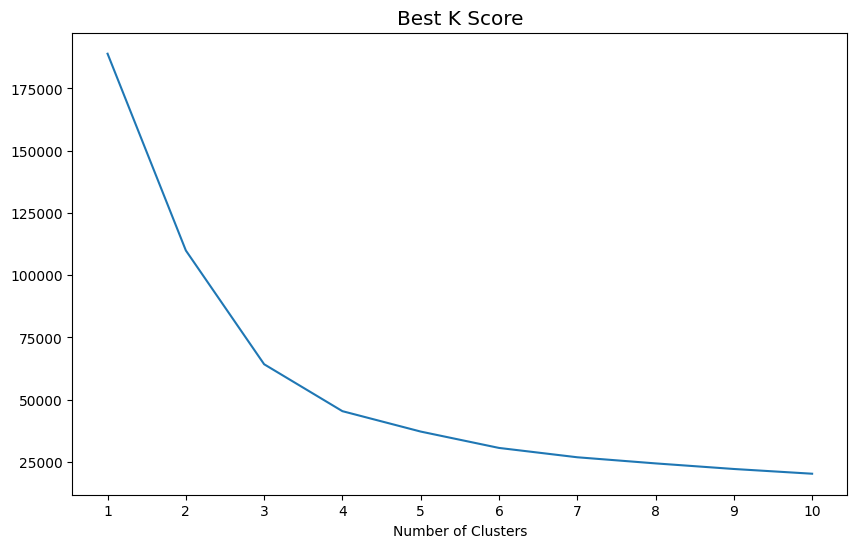

In [13]:
from sklearn.cluster import KMeans

score = []
k_value = range(1, 11)

for k in k_value:
    kmeans = KMeans(n_clusters= k, init='k-means++', random_state=42)
    kmeans.fit(df_rfm_scaled)
    cluster = kmeans.fit_predict(df_rfm_scaled)
    score.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(k_value, score)
plt.xlabel('Number of Clusters')
plt.xticks(k_value)
plt.style.use('ggplot')
plt.title('Best K Score')
plt.show()

In [14]:
df_rfm.corr()

,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM
LAST_TO_END,1.000000,-0.404999,-0.369509
FLIGHT_COUNT,-0.404999,1.000000,0.850411
SEG_KM_SUM,-0.369509,0.850411,1.000000


 For k = 8, the silhouette score is: [0.5398243954237708, 0.4958202063496775, 0.4828319047726393, 0.42961413221154493, 0.40925999309285604, 0.39622107486889885, 0.3657692950468537]


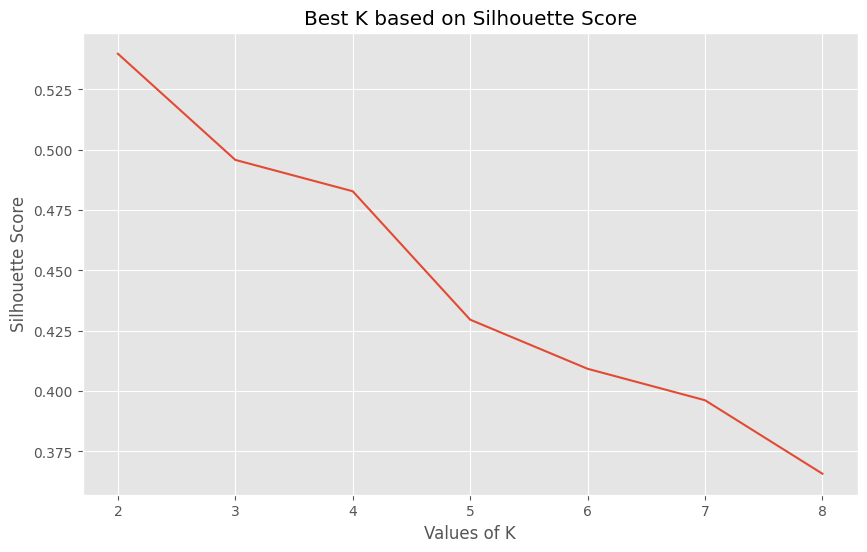

In [15]:
# Calculate Silhouette Score
from sklearn.metrics import silhouette_score

k_value = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []

for k in k_value:
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(df_rfm_scaled)
    cluster_labels = kmeans.predict(df_rfm_scaled)

    silhouette_avg.append(silhouette_score(df_rfm_scaled, cluster_labels))

print(" For k = {}, the silhouette score is: {}".format(k, silhouette_avg))
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(k_value, silhouette_avg)
plt.xlabel('Values of K')
plt.xticks(k_value)
plt.ylabel('Silhouette Score')
plt.style.use('ggplot')
plt.title('Best K based on Silhouette Score')
plt.show()

1) K-Means dengan menggunakan Euclidean Distance

In [16]:
df_2_result = df_rfm_scaled.copy()
df_2_result

,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM
0,-0.952668,14.104600,26.888115
1,-0.920027,9.122166,13.193949
2,-0.898267,8.766278,12.718487
3,-0.430420,0.794384,12.605132
4,-0.930907,9.976297,13.969210
...,...,...,...
62983,0.657597,-0.700346,-0.762851
62984,-0.473940,-0.557991,-0.434522
62985,-0.800345,-0.700346,-0.693197
62986,1.217925,-0.700346,-0.629268


In [17]:
# k = 2 (berdasarkan nilai silhouette)

kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=10000, random_state=42)
kmeans.fit(df_2_result)
df_2_result['cluster'] = kmeans.labels_

df_2_result
# plt.scatter(df_rfm_scaled.iloc[:, 0], df_rfm_scaled.iloc[:, 1], c=labels)
# plt.show()

,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,cluster
0,-0.952668,14.104600,26.888115,1
1,-0.920027,9.122166,13.193949,1
2,-0.898267,8.766278,12.718487,1
3,-0.430420,0.794384,12.605132,1
4,-0.930907,9.976297,13.969210,1
...,...,...,...,...
62983,0.657597,-0.700346,-0.762851,0
62984,-0.473940,-0.557991,-0.434522,0
62985,-0.800345,-0.700346,-0.693197,0
62986,1.217925,-0.700346,-0.629268,0


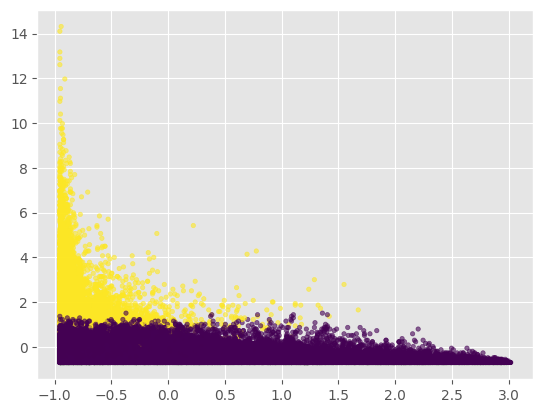

In [ ]:
plt.scatter(df_2_result.iloc[:, 0], df_2_result.iloc[:, 1], c=df_2_result['cluster'], alpha=0.6, s=10)
plt.show()

In [22]:
df_2_result = df_2_result.rename(columns={'LAST_TO_END' : 'R', 'FLIGHT_COUNT' : 'F', 'SEG_KM_SUM' : 'M'})
df_2_result

,R,F,M,cluster
0,-0.952668,14.104600,26.888115,1
1,-0.920027,9.122166,13.193949,1
2,-0.898267,8.766278,12.718487,1
3,-0.430420,0.794384,12.605132,1
4,-0.930907,9.976297,13.969210,1
...,...,...,...,...
62983,0.657597,-0.700346,-0.762851,0
62984,-0.473940,-0.557991,-0.434522,0
62985,-0.800345,-0.700346,-0.693197,0
62986,1.217925,-0.700346,-0.629268,0


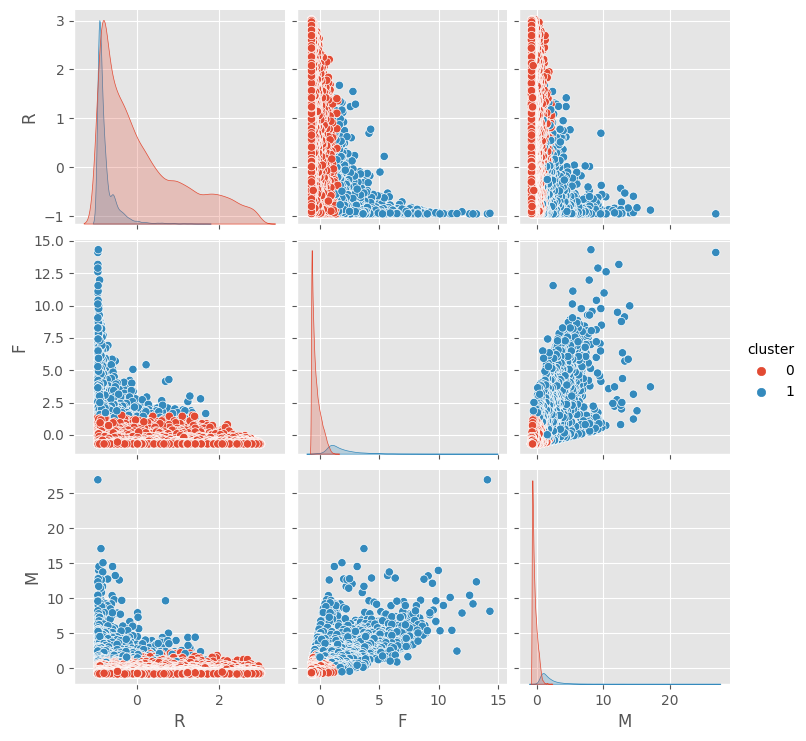

In [ ]:
import seaborn as sns 

sns.pairplot(data=df_2_result, hue='cluster')

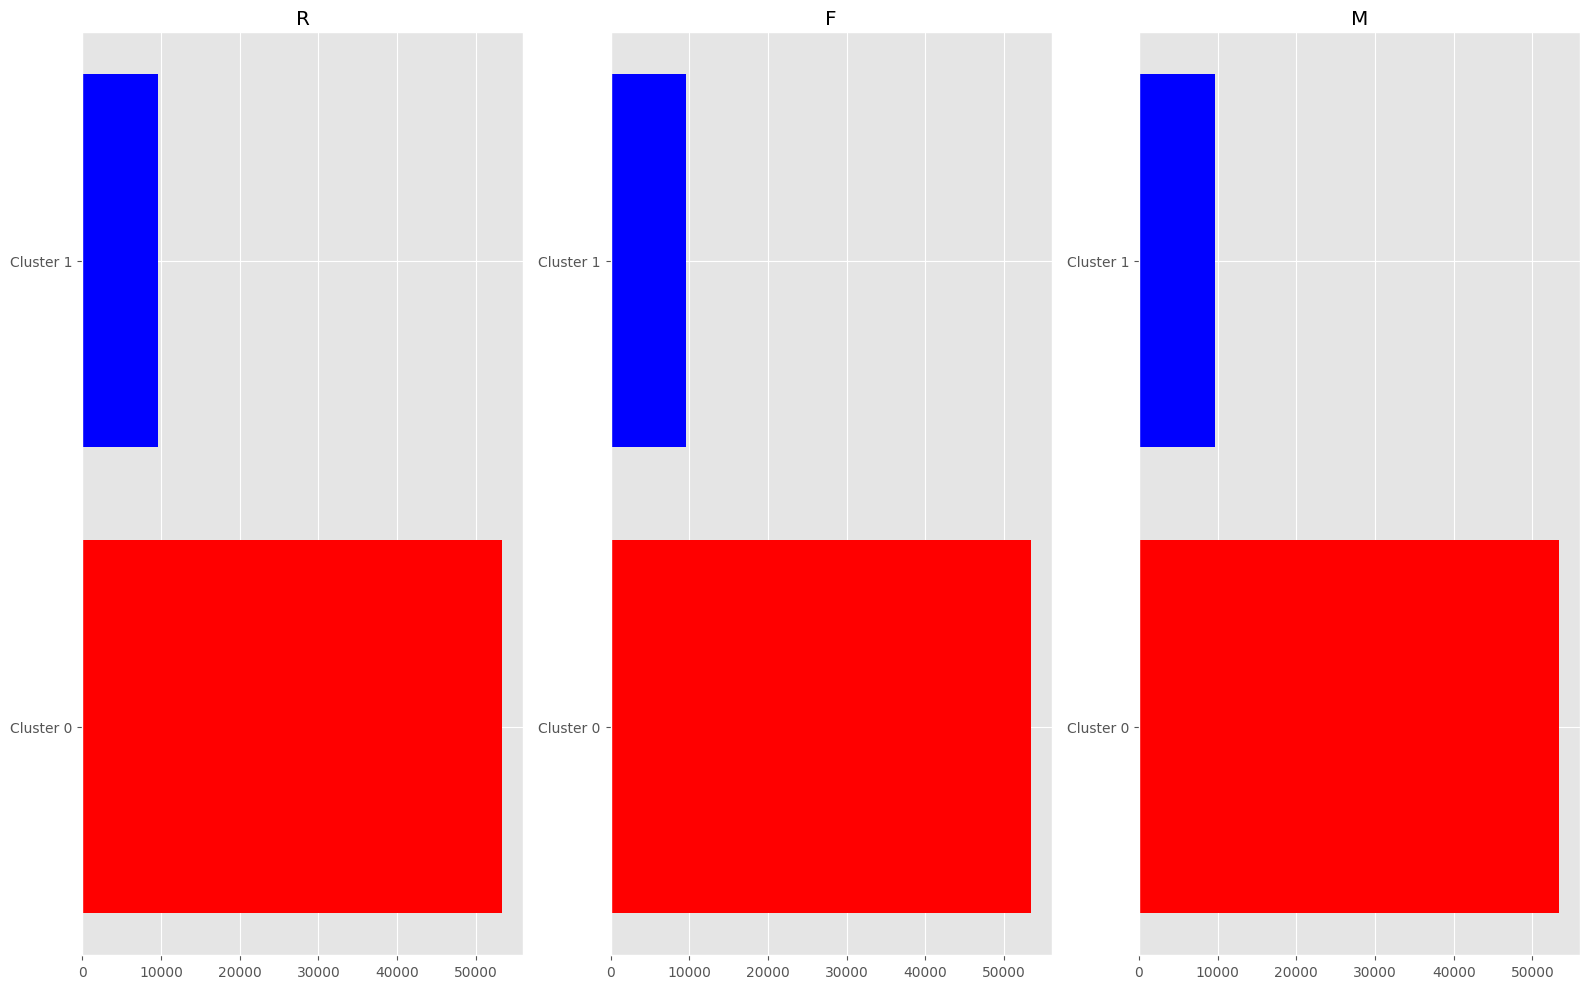

In [37]:
cluster_0 = df_2_result[df_2_result['cluster'] == 0].count()
cluster_1 = df_2_result[df_2_result['cluster'] == 1].count()

num_rows = 1
num_cols = 3

fig, ax = plt.subplots(num_rows, num_cols, figsize=(16, 10))
colors = ['red', 'blue']

for key, column_name in enumerate(['R', 'F', 'M']):
    ax[key].barh(y = [0,1], width = [cluster_0[column_name], cluster_1[column_name]], color=colors)
    ax[key].set_title(column_name)
    ax[key].set_yticks([0, 1])
    ax[key].set_yticklabels(['Cluster 0', 'Cluster 1'])



plt.tight_layout()
plt.show()



KeyError: 'cluster'

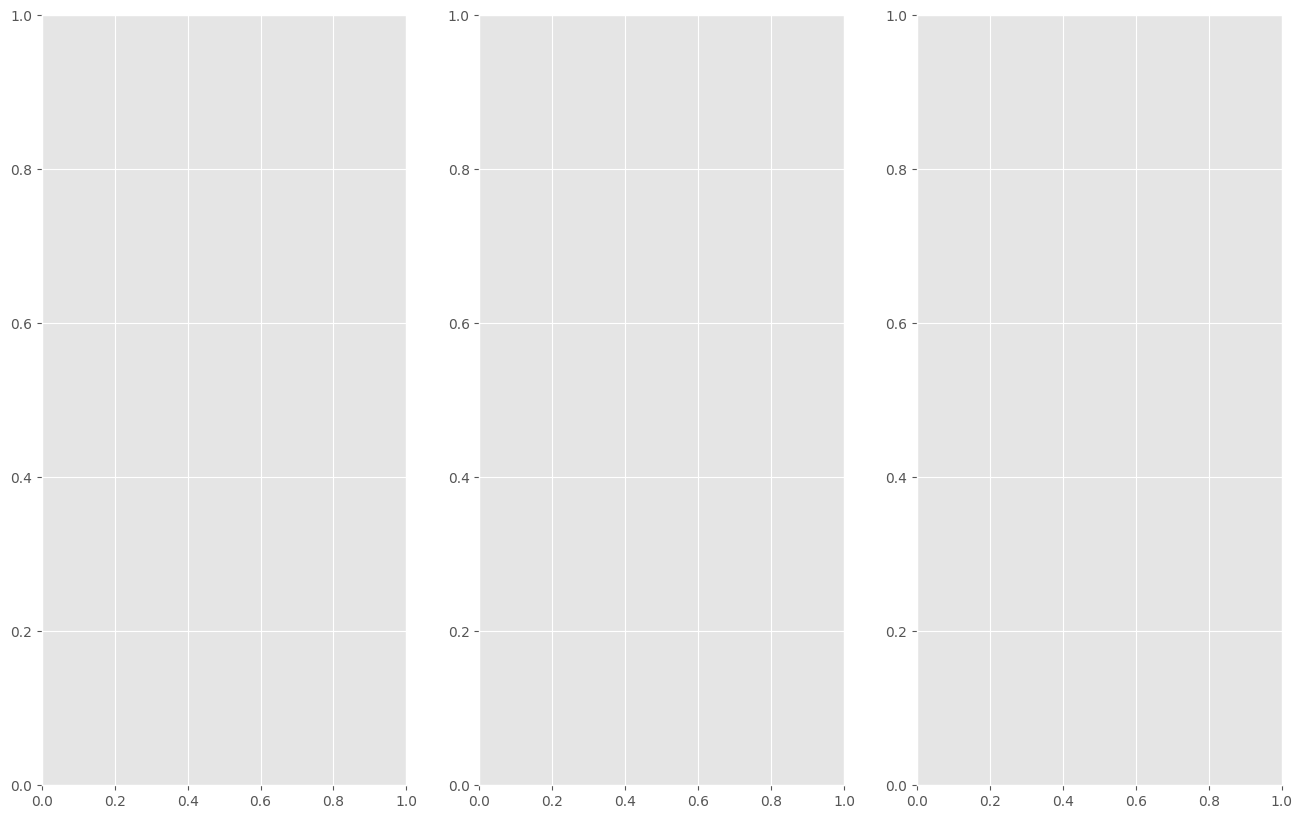

In [31]:
df_2 = df_2_result.loc[:, ~df_2_result.columns.isin(['cluster'])]

list_columns = list(df_2.columns)

num_rows = 1
num_cols = 3

fig, ax = plt.subplots(num_rows, num_cols, figsize=(16, 10))

for key, column_name in enumerate(list_columns):
    means = df_2.groupby('cluster')['column_name'].mean()
    ax[key].barh(y = means.index.astype(str), width = means.values)
    ax[key].set_title(column_name)

plt.tight_layout()
plt.show()

In [ ]:
# import plotly.graph_objects as go
# import plotly.offline as pyo 

# categories = df_2_result.columns
# # categories = [*categories, categories[0]]
# fig = go.Figure()

# for i in df_2_result.index:
#     fig.add_trace(go.Scatterpolar(
#         r = df_2_result.loc[i].values,
#         theta = categories,
#         fill = 'toself',
#         name = f'cluster #{i}'
#     ))

# fig.update_layout(
#     polar = dict(
#         radialaxis = dict(
#             visible = True,
#             range = [0, 5],
#         ),
#     ),
#     showlegend = True,
#     title = 'RFM with PlotLy',
#     title_x = 0.5
# )

# pyo.plot(fig)

# fig.show(renderer = 'browser')
# pio.write_image(fig, 'figure.png')

'temp-plot.html'

ValueError: x and y must have same first dimension, but have shapes (4,) and (5,)

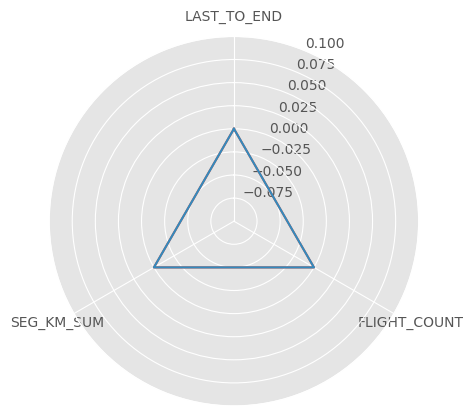

In [ ]:
# num_clusters = 2
# margin = 0.1

# labels = ['Cluster' + str(i+1) for i in range(num_clusters)]

# means = []
# for i in range(num_clusters):
#     cluster_data = df_rfm_scaled[df_rfm_scaled['cluster'] == i]
#     means.append([df_rfm_scaled[col].mean() for col in df_rfm_scaled.columns[:-1]])

# columns = list(df_rfm_scaled.columns[:-1])

# angles = np.linspace(0, 2*np.pi, len(columns), endpoint=False)
# angles = np.concatenate((angles, [angles[0]]))
# ranges = [(0, 1) for i in range(len(columns))]
# ranges = np.array(ranges).T

# fig, ax = plt.subplots(subplot_kw={'projection' : 'polar'})
# ax.set_theta_zero_location('N')
# ax.set_theta_direction(-1)
# ax.set_ylim(bottom = np.array(ranges).flatten().min() - margin, top = np.array(ranges).flatten()[1] + margin)
# ax.set_xticks(angles[:-1])
# ax.set_xticklabels(columns)

# for i in range(num_clusters):
#     values = means[i]
#     values = np.concatenate((values, [values[0]]))
#     ax.plot(angles, values, label = labels[i])

# values = np.concatenate((values, [values[0]]))
# ax.fill(angles, values, alpha = 0.1)
# ax.legend(loc = 'upper right', bbox_to_anchor = (1.3, 1.1))
# plt.show()

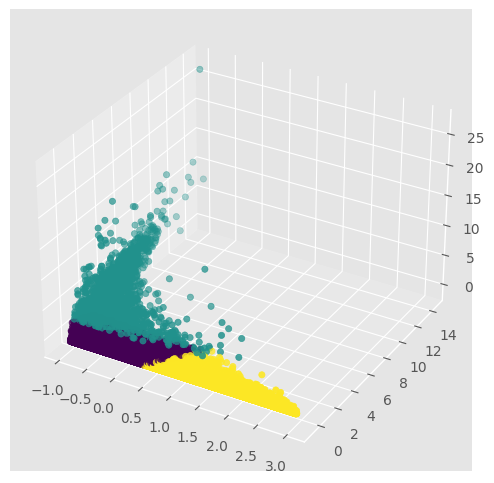

In [ ]:
# k = 3 (berdasarkan elbow method)

from mpl_toolkits.mplot3d import Axes3D

kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=10000, random_state=42)
kmeans.fit(df_rfm_scaled)
labels = kmeans.labels_

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_rfm_scaled.iloc[:, 0], df_rfm_scaled.iloc[:, 1], df_rfm_scaled.iloc[:, 2], c=labels)

plt.show()